#  PROBLEM STATEMENT

###  Create a machine learning model which will help the company in determining the salary of newly hired employees of TechWorks Consulting using the given data. 


### Questions 

#### 1. Your views about the problem statement? 

Answer : The problem statement involves developing a regression model to predict the salary of newly hired employees based on various features provided in the dataset. It is a common problem in HR and talent acquisition where understanding the factors that influence salary is crucial. By creating a predictive model, TechWorks Consulting can ensure fair and competitive compensation for their employees.

####  2. What will be your approach to solving this task?

Answer : To solve this task, we can follow these steps:

a. Load the dataset and preprocess the data by handling missing values, outliers, and categorical variables (e.g., converting college names and city types into numerical data, creating dummy variables for the "Role" feature) .

b. Splitting the data into training and testing sets.

c. Select an appropriate regression model (e.g., Linear Regression, Random Forest Regression) and  make predictions on the test data.

d. Evaluate the model's performance using suitable metrics such as Mean Squared Error (MSE) and  R-squared.

e. Finally, we have to provide an explanation of the selected model, its performance, and suggestions for further improvement.

#### 3. What were the available ML model options you had to perform this task? 

Answer : For regression tasks, the below mentioned  are the available ML models:

a. Multiple Linear Regression 

b. Ridge 

c. Lasso

d. K-Nearest Neighbors

e. Decision Tree

f. Bagging 

g. Random Forest

h. Gradient Boosting

i. AdaBoost 

j. XGBoost

#### 4. Which model’s performance is best and what could be the possible reason for that? 

Answer: Among all the available ML model's Random Forest performed better with lowest MSE and high R2 score of 0.66. The  reason could be of the following:

a. Handling Non-linearity: Random Forest is a tree-based ensemble model that can handle non-linear relationships between the input features and the target variable. It can capture complex interactions and non-linear patterns in the data, which can be beneficial when predicting salaries that may have non-linear relationships with the input features.

b. Robust to Outliers: Random Forest is less sensitive to outliers compared to some other models like Linear Regression. Outliers in the data can significantly impact the performance of linear models, but Random Forest can handle outliers more effectively by averaging predictions from multiple trees.

c. Handling Feature Interactions: Random Forest can capture feature interactions and identify important features in the dataset. It considers random subsets of features at each split, allowing it to find useful feature interactions that can be missed by other models. This can be advantageous when there are complex relationships and interactions among the input features that affect employee salaries.

d. Resistant to Overfitting: Random Forest uses bootstrapping and feature randomization techniques, which help to reduce overfitting. It builds multiple decision trees on different subsets of the data and combines their predictions through averaging or voting. This ensemble approach reduces the model's tendency to overfit the training data and improves its generalization ability.

e. Robust to Irrelevant Features: Random Forest can handle datasets with a large number of features, including irrelevant ones. It automatically assesses the importance of each feature based on its contribution to the overall performance of the model. This allows Random Forest to effectively handle datasets with high-dimensional feature spaces, such as employee data with various attributes.

f. Hyperparameter Tuning: The performance of  Random Forest  can heavily depend on their  hyperparameters. It's possible that the hyperparameters of Random Forest were tuned more effectively suited for the dataset in question, leading to better performance.

        

#### 5. What steps can you take to improve this selected model’s performance even further? 

Answer:To improve the performance of  Random Forest model, we can consider the following steps:

a.Collect more data: Increasing the size of the dataset can often lead to improved model performance. Adding more data to the existing features can help the Random Forest model capture a wider range of patterns and generalize better to unseen instances.


b. Feature Engineering: We can explore the possibility of creating new features that might better capture the relationship with the target variable.

c. Feature selection: Random Forest models are robust to noisy and irrelevant features, but including too many irrelevant features can still degrade performance. Conducting feature selection techniques can help improve the model's performance by focusing on the most informative features.

d. Tune Hyperparameters: Experiment with different values for the hyperparameters of the Random Forest model. Grid search  can be employed to systematically explore different combinations of hyperparameters and find the optimal values that improve the model's performance. 


e.Cross-validation: Using Cross-validation it will help to assess the model's generalization ability and provides a more reliable estimate of its performance. It helps detect overfitting and ensures that the model performs well on unseen data.


# IMPORT NECESSARY LIBRARY 

In [358]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#  LOAD DATASET

In [359]:
employee_data = pd.read_csv('C:\\Users\\ntpc\\Downloads\\Employee.csv')
colleges = pd.read_csv('C:\\Users\\ntpc\\Downloads\\Colleges.csv')
cities = pd.read_csv('C:\\Users\\ntpc\\Downloads\\cities.csv')

# DATA PREPROCESSING

###  Handling Categorical Values

In [360]:
# Converting cities dataset to numerical mapping in employee_data['City']
# First Converting values of cities dataset to list
city_mapping= {}
metro_city=cities['Metrio City'].tolist()
non_metro_city=cities['non-metro cities'].tolist()

In [361]:
# Assigning metro_city as 1 and non_metro_city as 0 and then mapping in employee_data['City']
for city in metro_city:
    city_mapping[city] = 1

for city in non_metro_city:
    city_mapping[city] = 0

employee_data['City'] = employee_data['City'].map(city_mapping)

In [362]:
# Converting colleges dataset to numerical mapping in employee_data['College']
# First Converting values of colleges dataset to list
college_mapping = {}
tier1_colleges = colleges['Tier 1'].tolist()
tier2_colleges = colleges['Tier 2'].tolist()
tier3_colleges = colleges['Tier 3'].tolist()

In [363]:
# Assigning tier1_colleges as 1 , tier2_colleges as 2 , tier3_colleges as 3 and then mapping in employee_data['College']
for college in tier1_colleges:
    college_mapping[college] = 1

for college in tier2_colleges:
    college_mapping[college] = 2

for college in tier3_colleges:
    college_mapping[college] = 3

employee_data['College'] = employee_data['College'].map(college_mapping)

In [364]:
# Creating dummy variable for Role Column in employee_data
employee_data = pd.get_dummies(employee_data, columns=['Role'], drop_first=True)

In [365]:
employee_data.head(10)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0
5,2,0,54340.0,4,73,31,59950.89,0
6,3,1,60298.0,1,42,46,66602.34,0
7,2,1,49944.0,2,56,37,57768.44,0
8,3,1,53124.0,4,40,37,70083.30,0
9,1,0,51141.0,1,47,60,85648.48,0


In [366]:
# Shape of employee_data
employee_data.shape

(1589, 8)

Since shape of  employee_data doesn't change  post preprocessing it suggest that there are no duplicated values

In [367]:
employee_data.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


## Checking Null Values 

In [368]:
# Checking Null Values
employee_data.isnull().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

No Null Values Detected

In [369]:
# Coverting Role_Manager data Type into integer data type
employee_data['Role_Manager'] = employee_data['Role_Manager'].astype(int)

In [370]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


## Checking Outliers 

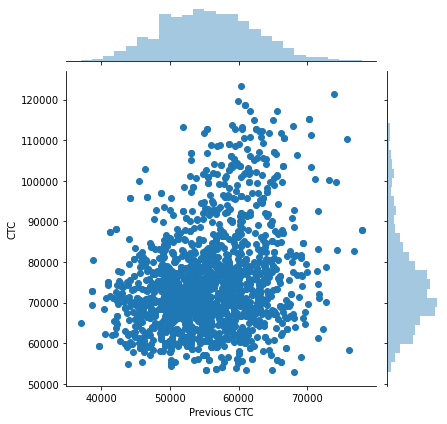

In [371]:
# Checking outliers for Previous CTC w.r.t target variable CTC
sns.jointplot(x='Previous CTC',y='CTC',data=employee_data)

No outliers detected as there are no such data points which shows unusual observation 

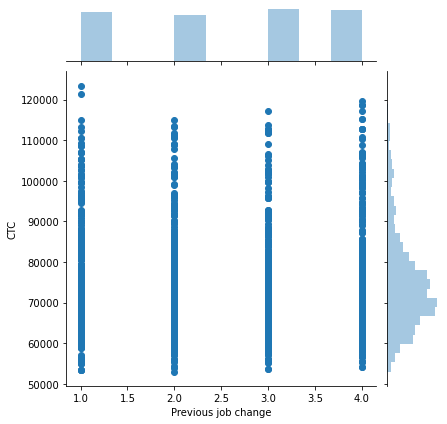

In [372]:
# Checking outliers for Previous job change w.r.t target variable CTC
sns.jointplot(x='Previous job change',y='CTC',data=employee_data)

No outliers detected as there are no such data points which shows unusual observation 

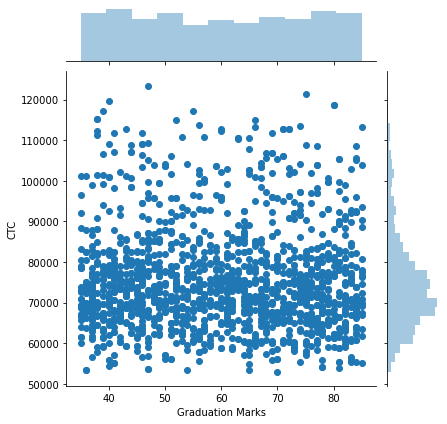

In [373]:
# Checking outliers for Graduation Marks w.r.t target variable CTC
sns.jointplot(x='Graduation Marks',y='CTC',data=employee_data)

No outliers detected as there are no such data points which shows unusual observation 

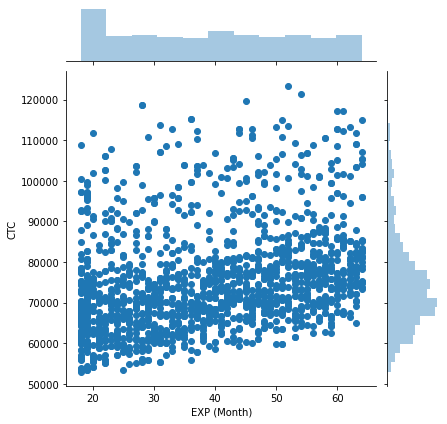

In [374]:
# Checking outliers for EXP (Month) w.r.t target variable CTC
sns.jointplot(x='EXP (Month)',y='CTC',data=employee_data)

No outliers detected as there are no such data points which shows unusual observation

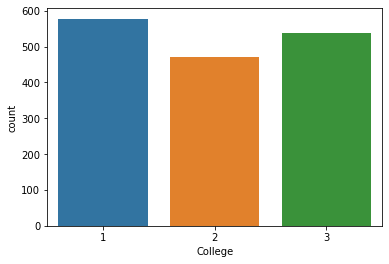

In [375]:
# Checking outliers for College w.r.t target variable CTC
sns.countplot(x='College',data=employee_data)

No outliers detected 

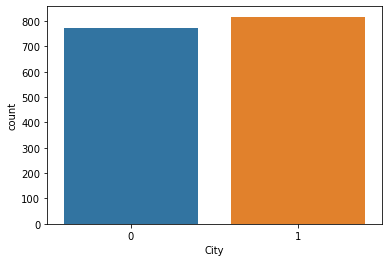

In [376]:
# Checking outliers for City w.r.t target variable CTC
sns.countplot(x='City',data=employee_data)

No outliers detected 

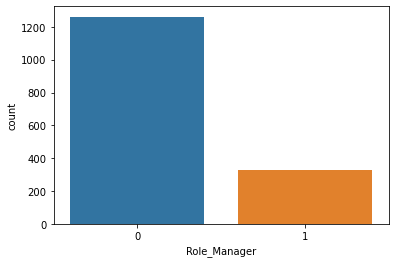

In [377]:
# Checking outliers for Role_Manager w.r.t target variable CTC
sns.countplot(x='Role_Manager',data=employee_data)

No outliers detected 

## Implementing Feature Selection Using Correlation

In [378]:
correlation=employee_data.corr()
correlation

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


From the above observation it is noted that Previous CTC , Exp(Month) and Role_Manager are highly correlated . Also considering threshold =0.5 there are no such independent variables which shows multicollinearity among themselves.Since the dataset is small and no such multicollinearity present  we are not going delete any variable to predict CTC

## Steps Performing In Training the Model 

#### a. Taking all independent features or variables into X 
#### b. Taking only Target feature or variable in y
#### c. Splitting Train-Test data into 70:30 ratio
#### d. Implementing the available Regression model's , making prediction on the test data  and then  evaluating the model's performance using suitable metrics such as Mean Squared Error (MSE) and R-squared

## X-y split 

In [379]:
X = employee_data.drop(['CTC'] , axis=1)
y = employee_data['CTC']

In [380]:
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


In [381]:
X.shape

(1589, 7)

In [382]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [383]:
y.shape

(1589,)

## Test-Train Split

#### Applying Multiple Linear Regression  Model  

In [384]:
# Splitting Train-Test data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Applying Multiple Linear Regression Model
model = LinearRegression()

In [385]:
# Fitting the model
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print('Mean Squared Error:', mse)

Mean Squared Error: 71970784.43482201


In [386]:
print('R-squared:', r2)

R-squared: 0.5467294464871


## Applying Ridge Regression

In [387]:
# Since Ridge needs scaled values we implement StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
scalar1 = StandardScaler().fit(X_train)
X_train_s = scalar1.transform(X_train)

In [388]:
from sklearn.preprocessing import StandardScaler
scalar2 = StandardScaler().fit(X_test)
X_test_s = scalar2.transform(X_test)

In [389]:
# Applying Ridge Regression Model
lm_r=Ridge(alpha=0.5)
# Fitting the model
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [390]:
# Making predictions on the test data
y_pred = lm_r.predict(X_test_s)

# Calculating the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 71866792.63357721
R-squared: 0.5473843847607507


In [391]:
# Using validation curve to fetch optimal value of alpha for better efficiency
from sklearn.model_selection import validation_curve

In [392]:
import numpy as np
param_range=np.logspace(-2,8,100)

In [393]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [394]:
train_scores,test_scores=validation_curve( Ridge(),X_train_s,y_train,"alpha",param_range,scoring='r2')

P:\Objects\pro1\pes\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.72236766

In [395]:
train_mean=np.mean(train_scores,axis=1)

In [396]:
test_mean=np.mean(test_scores,axis=1)

In [397]:
max(test_mean)

0.516252885106533

In [398]:
np.where(test_mean==max(test_mean))

(array([29], dtype=int64),)

In [399]:
param_range[29]

8.497534359086439

In [400]:
lm_r_best=Ridge(alpha=param_range[29])

In [401]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=8.497534359086439)

In [402]:
r2 = r2_score(y_test, lm_r_best.predict(X_test_s))

In [403]:
r2

0.5471298585640656

## Applying Lasso  

In [404]:
# Since Lasso needs scaled values we implement StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
scalar1 = StandardScaler().fit(X_train)
X_train_s = scalar1.transform(X_train)

In [405]:
from sklearn.preprocessing import StandardScaler
scalar2 = StandardScaler().fit(X_test)
X_test_s = scalar2.transform(X_test)

In [406]:
# Applying Lasso Regression Model
lm_r=Lasso(alpha=0.4)
# Fitting the model
lm_r.fit(X_train_s,y_train)

Lasso(alpha=0.4)

In [407]:
# Making predictions on the test data
y_pred = lm_r.predict(X_test_s)

# Calculating the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 71863742.36377937
R-squared: 0.5474035952986167


In [408]:
import numpy as np
param_range=np.logspace(-2,8,100)

In [409]:
# using validation curve to get optimal value of alpha for better efficiency
train_scores,test_scores=validation_curve( Lasso(),X_train_s,y_train,"alpha",param_range,scoring='r2')

P:\Objects\pro1\pes\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-02 1.26185688e-02 1.59228279e-02 2.00923300e-02
 2.53536449e-02 3.19926714e-02 4.03701726e-02 5.09413801e-02
 6.42807312e-02 8.11130831e-02 1.02353102e-01 1.29154967e-01
 1.62975083e-01 2.05651231e-01 2.59502421e-01 3.27454916e-01
 4.13201240e-01 5.21400829e-01 6.57933225e-01 8.30217568e-01
 1.04761575e+00 1.32194115e+00 1.66810054e+00 2.10490414e+00
 2.65608778e+00 3.35160265e+00 4.22924287e+00 5.33669923e+00
 6.73415066e+00 8.49753436e+00 1.07226722e+01 1.35304777e+01
 1.70735265e+01 2.15443469e+01 2.71858824e+01 3.43046929e+01
 4.32876128e+01 5.46227722e+01 6.89261210e+01 8.69749003e+01
 1.09749877e+02 1.38488637e+02 1.74752840e+02 2.20513074e+02
 2.78255940e+02 3.51119173e+02 4.43062146e+02 5.59081018e+02
 7.05480231e+02 8.90215085e+02 1.12332403e+03 1.41747416e+03
 1.78864953e+03 2.25701972e+03 2.84803587e+03 3.59381366e+03
 4.53487851e+03 5.72236766

In [410]:
train_mean=np.mean(train_scores,axis=1)

In [411]:
test_mean=np.mean(test_scores,axis=1)

In [412]:
max(test_mean)

0.5164390233754533

In [413]:
np.where(test_mean==max(test_mean))

(array([38], dtype=int64),)

In [414]:
param_range[38]

68.92612104349695

In [415]:
lm_r_best=Lasso(alpha=param_range[38])

In [416]:
lm_r_best.fit(X_train_s,y_train)

Lasso(alpha=68.92612104349695)

In [417]:
r2 = r2_score(y_test, lm_r_best.predict(X_test_s))

In [418]:
r2

0.5480529569555246

### Applying KNN Model Using GridSearch

In [419]:
# Since KNN needs scaled values we implement StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
scalar1 = StandardScaler().fit(X_train)
X_train_s = scalar1.transform(X_train)

In [420]:
from sklearn.preprocessing import StandardScaler
scalar2 = StandardScaler().fit(X_test)
X_test_s = scalar2.transform(X_test)

In [421]:

# Defining the parameter grid for grid search
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]} 

# Create the KNN model
knn_model = KNeighborsRegressor()

# Performing grid search using cross-validation
grid_search = GridSearchCV(knn_model, params)
grid_search.fit(X_train_s, y_train)

grid_search.best_params_

# Retrieving the best model
best_knn_model = grid_search.best_estimator_

# Making predictions on the testing set using the best model
y_pred = best_knn_model.predict(X_test_s)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Best Parameters: {'n_neighbors': 10}
Mean Squared Error (MSE): 70615542.41214117
R-squared: 0.5552647335009686


## Applying Decision Tree 

In [422]:
# Implementing Decision Tree
from sklearn import tree
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [423]:
# Fitting the model
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [424]:
# Predicting the model on the test data
y_pred = regtree.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 63547766.31545223
R-squared: 0.5997774452715718


## Applying Bagging

In [425]:
# Implementing Bagging
from sklearn.ensemble import BaggingRegressor

In [426]:
bag_reg=BaggingRegressor()

In [427]:
# Fitting the model
bag_reg.fit(X_train,y_train)

BaggingRegressor()

In [428]:
# Predicting the model on the test data
y_pred = bag_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 58493799.35302389
R-squared: 0.6316072275990162


## Random Forest 

In [429]:
# Implementing Random Forest
rf_regressor = RandomForestRegressor(n_estimators=1000,n_jobs=-1, random_state=0)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Predicting the model on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 52521181.36020534
R-squared: 0.6692226556478471


## Gradient Boosting

In [430]:
from sklearn.ensemble import GradientBoostingRegressor

In [431]:
# Implementing Gradient Boosting
gbr_reg=GradientBoostingRegressor()
# Fitting the model
gbr_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [432]:
# Predicting the model on the test data
y_pred = gbr_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 58952193.219912946
R-squared: 0.6287202722406251


## Ada Boost

In [433]:
from sklearn.ensemble import AdaBoostRegressor 

In [434]:
# Implementing Ada Boost
ada_reg=AdaBoostRegressor(n_estimators=500)
# Fitting the model
ada_reg.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=500)

In [435]:
# Predicting the model on the test data
y_pred = ada_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 62655485.96642399
R-squared: 0.6053970089718812


## XG Boost

In [436]:
# Implementing XG Boost
xgb_reg=xgb.XGBRegressor(max_depth=3,n_estimators=100,n_jobs=-1)
# Fitting the model
xgb_reg.fit(X_train,y_train)
# Predicting the model on the test data
y_pred = xgb_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 58538243.84358566
R-squared: 0.6313273170909436
